In [10]:
# 📦 Load and preview the Netflix dataset, parse dates, and create helper columns

import pandas as pd
import numpy as np

# Read the CSV with provided encoding
netflix_df = pd.read_csv('Netflix Dataset.csv', encoding='utf-8')

# Standardize column names
netflix_df.columns = [c.strip().replace(' ', '_') for c in netflix_df.columns]

# Parse Release_Date to datetime and extract year
netflix_df['Release_Date'] = pd.to_datetime(netflix_df['Release_Date'], errors='coerce')
netflix_df['Year'] = netflix_df['Release_Date'].dt.year

# Create primary genre by taking the first listed type in Type column
netflix_df['Primary_Genre'] = netflix_df['Type'].fillna('').apply(lambda x: x.split(',')[0].strip())

# Normalize Category (Movie vs TV Show)
if 'Category' in netflix_df.columns:
    netflix_df['Category'] = netflix_df['Category'].astype(str).str.strip()

# 🖼️ Preview main structure
display(netflix_df)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Primary_Genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,International TV Shows
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,Action & Adventure
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,Dramas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0,Dramas
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,Dramas
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0,Documentaries
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020.0,International TV Shows


Category,Movie,TV Show
Year,,
2008.0,1.0,1.0
2009.0,2.0,0.0
2010.0,1.0,0.0
2011.0,13.0,0.0
2012.0,3.0,0.0


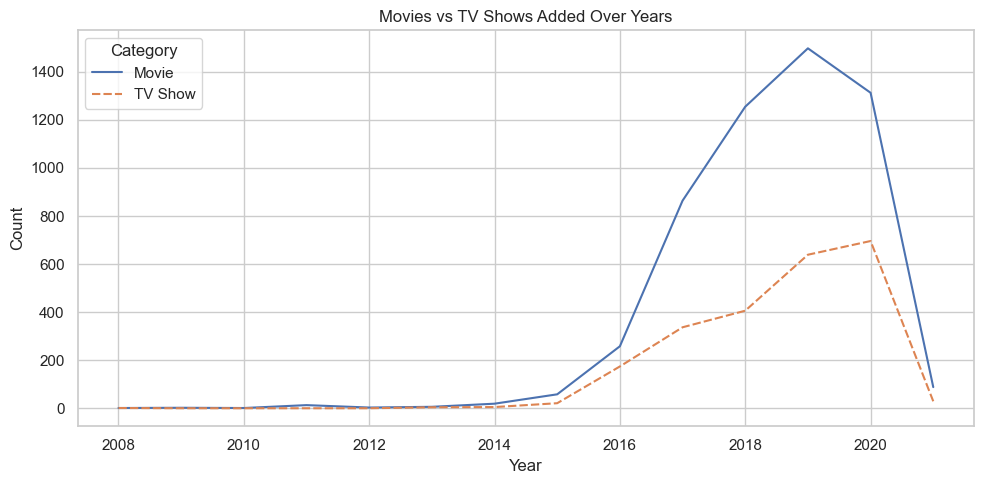

✅ Trend plot of Movies vs TV Shows over years is displayed.


In [11]:
# 📊 Analyze Movies vs TV Shows over years and show trends

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter
%matplotlib inline

# Optional: Set seaborn style for better visuals
sns.set(style="whitegrid")

# ✅ Group by Year and Category
counts_year_cat = netflix_df.dropna(subset=['Year']).groupby(['Year', 'Category']).size().reset_index(name='Count')

# 🔄 Pivot for plotting
pivot_counts = counts_year_cat.pivot(index='Year', columns='Category', values='Count').fillna(0).sort_index()

# 🖨️ Preview pivoted data
display(pivot_counts.head())

# 📈 Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=pivot_counts)
plt.title('Movies vs TV Shows Added Over Years')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

# ✅ Acknowledgment
print('✅ Trend plot of Movies vs TV Shows over years is displayed.')

In [12]:
# 📊 Analyze genre trends over years: count by Year x Primary_Genre and plot top genres over time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter
%matplotlib inline
sns.set(style="whitegrid")

# ✅ Compute counts by Year and Primary_Genre
genre_year = netflix_df.dropna(subset=['Year', 'Primary_Genre']) \
                        .groupby(['Year', 'Primary_Genre']) \
                        .size() \
                        .reset_index(name='Count')

# 🎯 Focus on top N genres overall
top_genres = genre_year.groupby('Primary_Genre')['Count'] \
                       .sum() \
                       .sort_values(ascending=False) \
                       .head(6) \
                       .index.tolist()

genre_year_top = genre_year[genre_year['Primary_Genre'].isin(top_genres)]

# 🔄 Pivot for plotting
pivot_genre = genre_year_top.pivot(index='Year', columns='Primary_Genre', values='Count') \
                            .fillna(0) \
                            .sort_index()

# 🖼️ Preview pivoted data
display(pivot_genre.head())

Primary_Genre,Action & Adventure,Children & Family Movies,Comedies,Documentaries,Dramas,International TV Shows
Year,,,,,,
2008.0,0.0,0.0,0.0,0.0,1.0,0.0
2009.0,0.0,0.0,0.0,0.0,1.0,0.0
2011.0,0.0,1.0,0.0,0.0,12.0,0.0
2012.0,0.0,1.0,1.0,1.0,0.0,0.0
2013.0,0.0,2.0,0.0,0.0,0.0,0.0


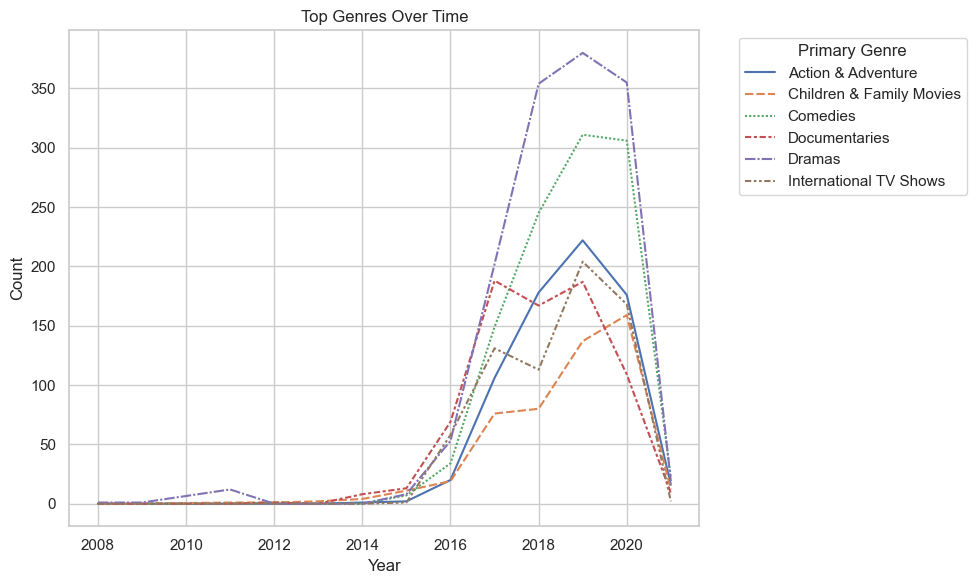

✅ Plotted genre trends over years.


In [13]:
# 📈 Plot top genres over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_genre)
plt.title('Top Genres Over Time')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(title='Primary Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ✅ Acknowledgment
print('✅ Plotted genre trends over years.')

In [14]:
# 🌍 Fix exploding countries and plot yearly trends for top 10 contributors

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter
%matplotlib inline
sns.set(style="whitegrid")

# 🧹 Normalize country list into long-form
country_long = (
    netflix_df[['Year', 'Country']]
    .dropna(subset=['Year', 'Country'])
    .assign(Country=lambda d: d['Country'].astype(str).str.split(','))
    .explode('Country')
)

country_long['Country'] = country_long['Country'].str.strip()

# 📊 Overall country counts
country_counts2 = country_long['Country'].value_counts().reset_index()
country_counts2.columns = ['Country', 'Count']

display(country_counts2.head())  # Rich preview

# 🎯 Top 10 countries
top10 = country_counts2.head(10)['Country'].tolist()

# 📈 Yearly counts for top 10
year_country = (
    country_long[country_long['Country'].isin(top10)]
    .groupby(['Year', 'Country'])
    .size()
    .reset_index(name='Count')
)

# 🔄 Pivot for plotting
pivot_country2 = (
    year_country.pivot(index='Year', columns='Country', values='Count')
    .fillna(0)
    .sort_index()
)

display(pivot_country2.head())  # Preview pivoted data

,Country,Count
0,United States,3251
1,India,989
2,United Kingdom,704
3,Canada,399
4,France,345


Country,Canada,France,Germany,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
Year,,,,,,,,,,
2008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2011.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0
2012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0


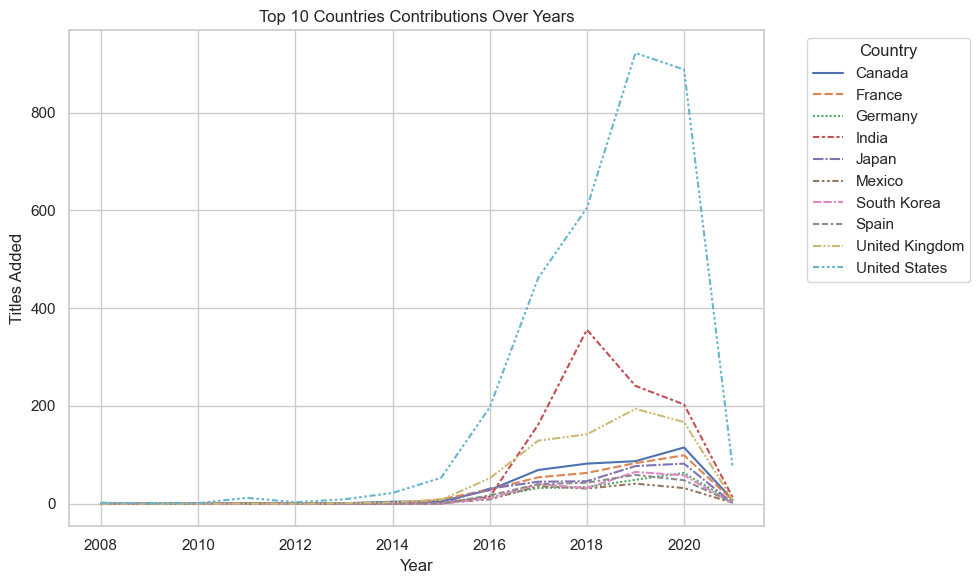

✅ Plotted top 10 countries contribution trends.


In [15]:
# 📉 Plot yearly trends for top 10 countries
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_country2)
plt.title('Top 10 Countries Contributions Over Years')
plt.ylabel('Titles Added')
plt.xlabel('Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ✅ Acknowledgment
print('✅ Plotted top 10 countries contribution trends.')